In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
import seaborn
import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
fLauCounter = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts.zip")
fLau = pd.read_csv(r"E:\netData\MAG-nobel\361 Nobel laureates.csv")

In [4]:
fLau['Is paired'] = fLau['Laureate name'].map(dict(zip(fLauCounter['Laureate name'].unique() , [1]*361)))
fLau.fillna(0 , inplace = True)

In [6]:
# ffLau = fLau[fLau['Is paired']==1]
# ffLau['Pub year']=ffLau['Laureate name'].map(Nobelpapers.drop_duplicates(subset = 'Laureate name').set_index('Laureate name')['Pub year'])

In [7]:
fLauCounter0 = fLauCounter[['Field','Laureate name','pub num', 'total cit', 'h', 'g', 'max cit', 'max2', 'max3', 'max4', 'max5','If Prize']]
fLauCounter0.columns = ['Field','Laureate name','Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr','If Prize']

In [8]:
ffLau0 = ffLau[['field','Laureate name','pub num', 'total cit', 'h', 'g', 'max cit', 'max2', 'max3', 'max4', 'max5']]
ffLau0['If Prize'] = 1
ffLau0.columns = ['Field','Laureate name','Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr','If Prize']

In [9]:
ffLau1 = ffLau0[ffLau0['Field']=='Physics']
ffLau2 = ffLau0[ffLau0['Field']=='Chemistry']
ffLau3 = ffLau0[ffLau0['Field']=='Medicine ']

In [10]:
fLauCounter1 = fLauCounter0[fLauCounter0['Field']=='Physics']
fLauCounter2 = fLauCounter0[fLauCounter0['Field']=='Chemistry']
fLauCounter3 = fLauCounter0[fLauCounter0['Field']=='Medicine']

In [11]:
ff1 = pd.concat([ffLau1 , fLauCounter1])
ff2 = pd.concat([ffLau2 , fLauCounter2])
ff3 = pd.concat([ffLau3 , fLauCounter3])

# IR

In [12]:
def get_IR(threshold , v , f1):
    k = int(np.floor(len(f1)*threshold))
    f2 = f1.sort_values([v],ascending= False)
    f21 = f2.head(k)
    d = len(f21[f21['If Prize']==1])/301
    return d

In [13]:
flst = [ff1, ff2, ff3]

In [31]:
thresholds = [0.1,0.20]

In [32]:
vlst = ['Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr']

In [33]:
plt.rcParams['font.sans-serif'] = ['Arial'] 

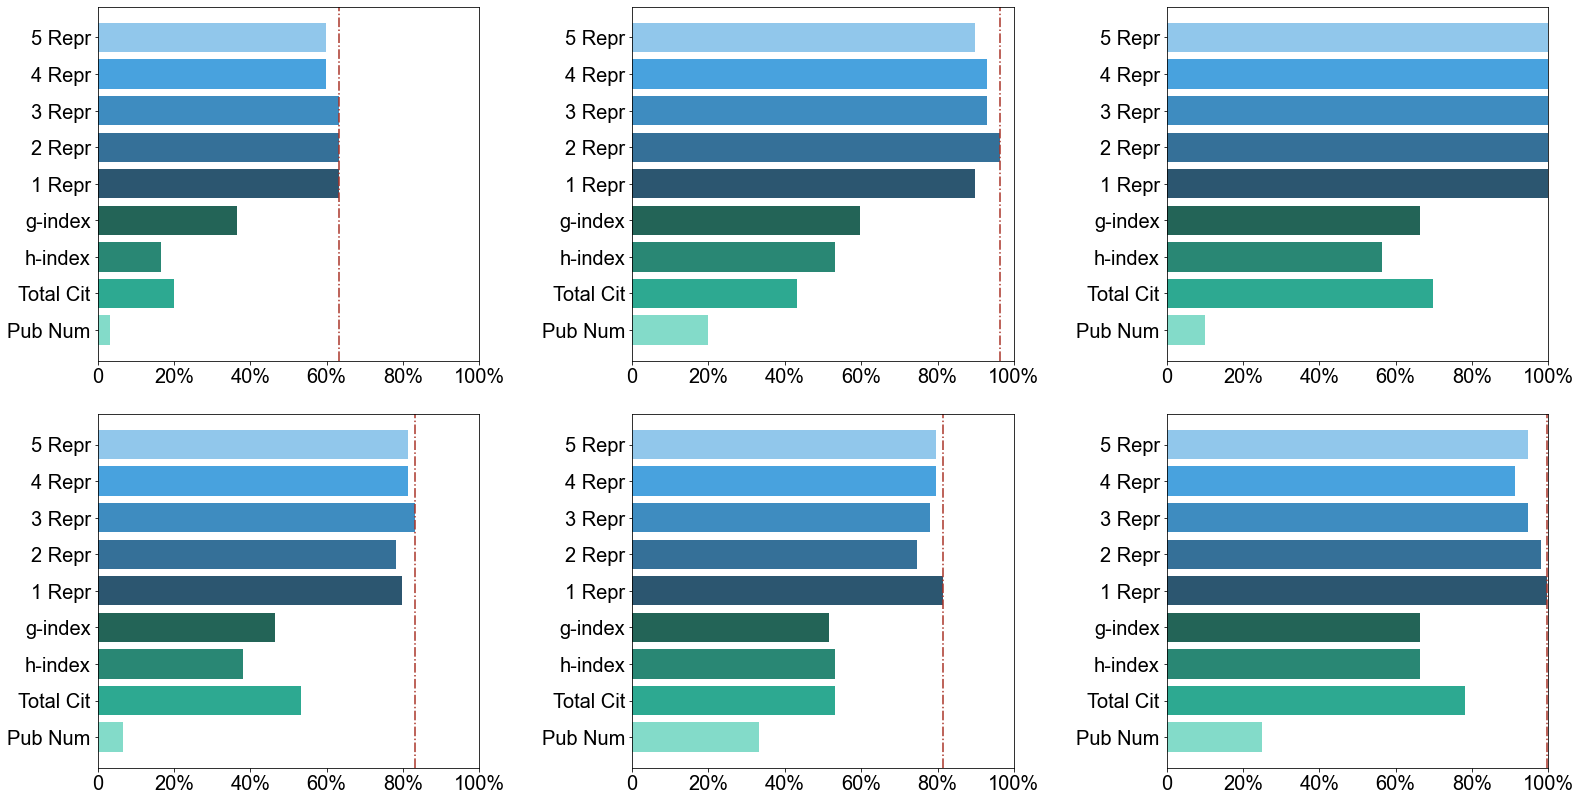

In [34]:
plt.subplots(2,3,figsize=(26,14))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.15)

for i in range(len(flst)):
    f = flst[i]
    for j in range(2):
        threshold = thresholds[j]
        dlst = [get_IR(threshold , v , f) for v in vlst]
        ax = plt.subplot(2,3,i+1+j*3)
        c = ['#76D7C4','#16A085','#117A65','#0B5345',"#154360","#1F618D","#2980B9","#3498DB","#85C1E9"]
        y_pos = [1,2,3,4,5,6,7,8,9]
        if j ==0:
            plt.xlim(0,0.10)
            plt.xticks([0,0.02,0.04,0.06,0.08,0.10] , [0 , '20%' , '40%', '60%', '80%', '100%'],fontsize=20)
        if j ==1:
            plt.xlim(0,0.20)
            plt.xticks([0,0.04,0.08,0.12,0.16,0.20] , [0 , '20%' , '40%', '60%', '80%', '100%'],fontsize=20)
        
        plt.axvline(x=max(dlst),ls = '-.', c = '#A93226')
        
        plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
        plt.yticks(y_pos,['Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr'],fontsize = 20)

plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 5\1.pdf",bbox_inches = 'tight')

# AR

In [35]:
def get_AR( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/len(lst)
    return d

def get_AR2( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/(lst[-1] - lst[0])/len(lst)
    return d

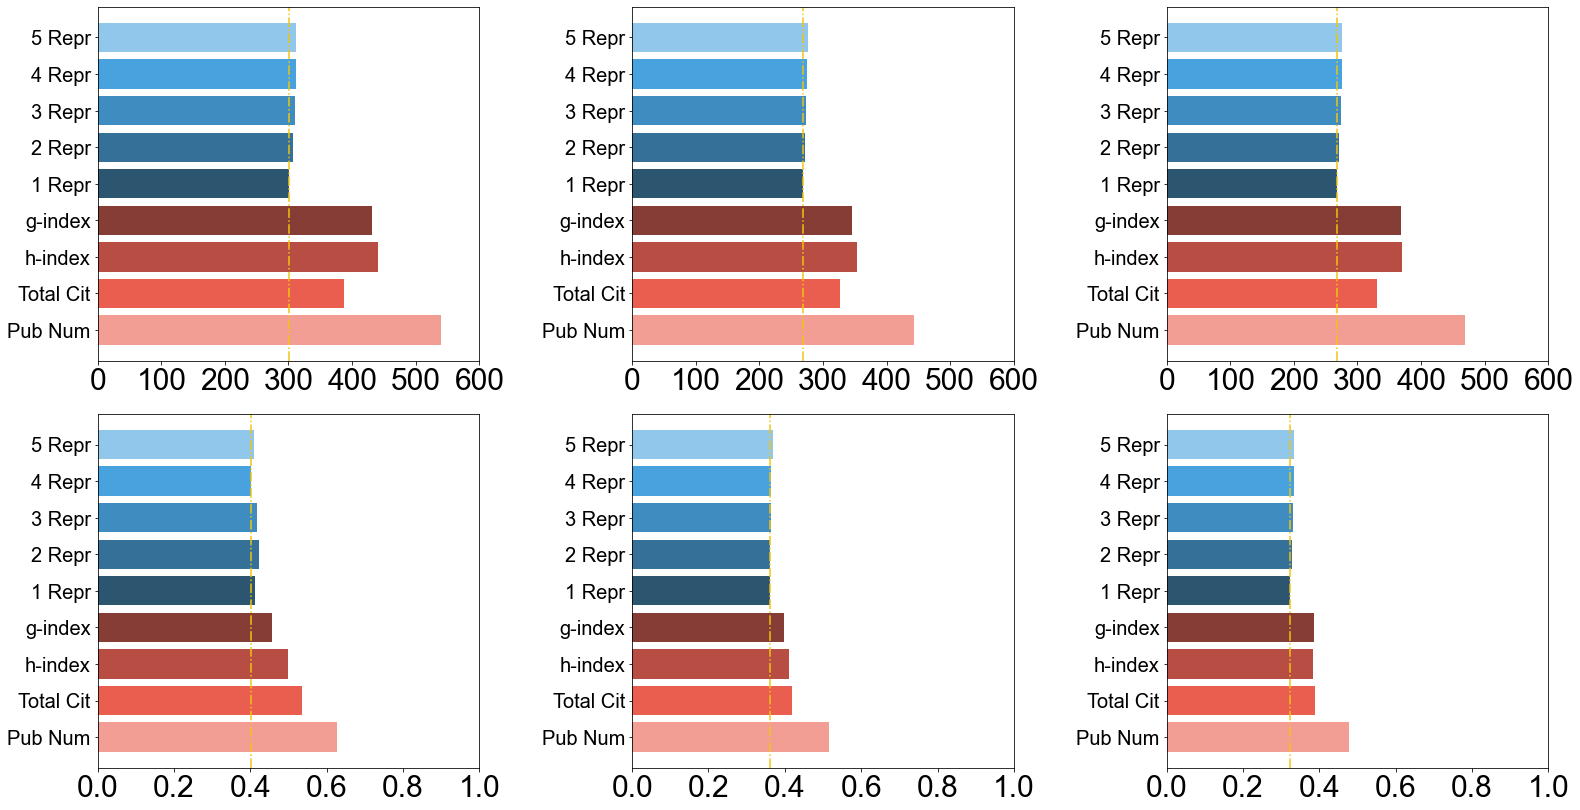

In [40]:
plt.subplots(2,3,figsize=(26,14))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.15)

for i in range(len(flst)):
    f = flst[i]
    for j in range(2):
        if j == 0:
            dlst = [get_AR(v , f) for v in vlst]
            plt.xlim(0,1)
        else:
            dlst = [get_AR2(v , f) for v in vlst]
            plt.xlim(0,600)
        ax = plt.subplot(2,3,i+1+j*3)
        c = ['#F1948A','#E74C3C','#B03A2E','#78281F',"#154360","#1F618D","#2980B9","#3498DB","#85C1E9"]
        y_pos = [1,2,3,4,5,6,7,8,9]
        plt.axvline(x=min(dlst),ls = '-.', c = '#F1C40F')
        plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
        plt.yticks(y_pos,['Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr'],fontsize = 20)
        plt.xticks(fontsize=30)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 5\2.pdf",bbox_inches = 'tight')